In [4]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 18})


N = 100
grid = np.arange(N)
m = 40

t = 10   # scale of bump
l = 5    # scale of wiggles

def kernel(i, j, m):
    return 10 * np.exp(-(i - j) **2 / (2 * l **2)) \
        * np.exp(-(i - m) **2 / (2 * t **2)) * np.exp(-(j - m) **2 / (2 * t **2))
K = np.zeros((N, N))
for i in np.arange(N):
    for j in np.arange(N):
        K[i, j] = kernel(float(i), float(j), m)
K = K + 1e-3 * np.eye(N)

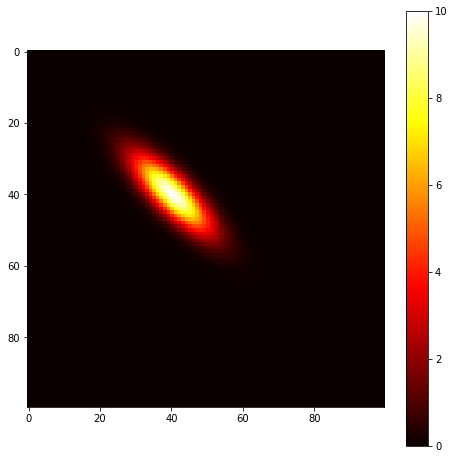

In [3]:
plt.figure(figsize=(8,8))
plt.imshow(K.T, cmap=plt.cm.get_cmap("hot"))
plt.colorbar()

(0, 99)

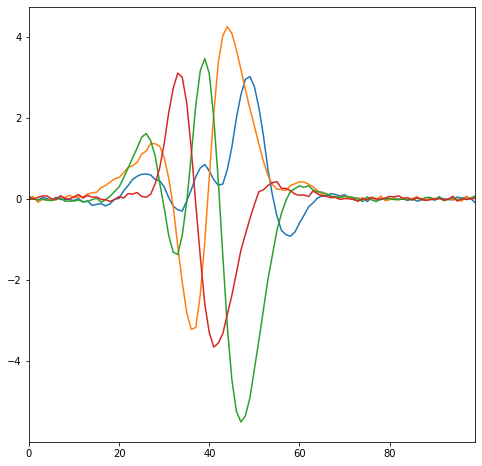

In [4]:
L = np.linalg.cholesky(K)
w = L @ np.random.randn(N,4)

plt.figure(figsize=(8,8))
#plt.plot(w, 'k-', alpha=0.7)
plt.plot(w)
plt.xlim([0,N-1])

In [5]:
K_eig, K_ev = np.linalg.eigh(K)

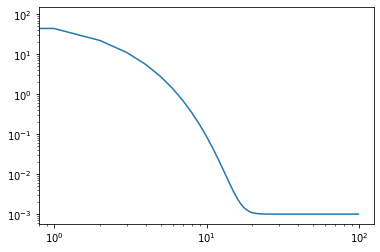

In [6]:
plt.loglog(np.flip(K_eig))

(0, 99)

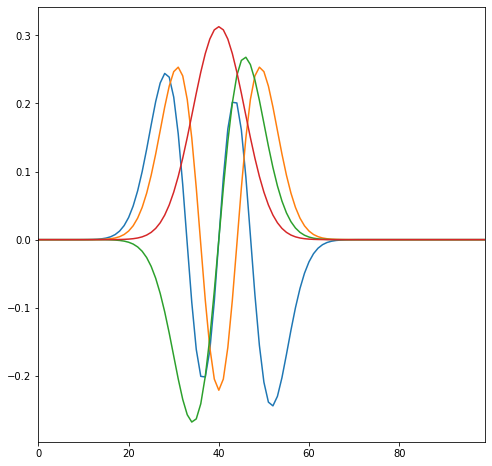

In [7]:
plt.figure(figsize=(8,8))
plt.plot(K_ev[:,-4:])
plt.xlim([0,N-1])

In [8]:
K_ev.shape

(100, 100)

## 2D version

In [16]:
from itertools import product
N = 20
grid = np.arange(N)

# middle of bump
m = np.array([8, 4])

# parameters of bump... isotropic
t = 4   # scale of bump
l = 5    # scale of wiggles

def kernel(i, j, m):
    return 10 * np.exp(-np.linalg.norm(i - j) **2 / (2 * l **2)) \
        * np.exp(- np.linalg.norm(i - m) **2 / (2 * t **2)) \
        * np.exp(- np.linalg.norm(j - m) **2 / (2 * t **2))

K = np.zeros((N**2, N**2))
for i in product(np.arange(N), np.arange(N)):
    for j in product(np.arange(N), np.arange(N)):
        idx1 = i[0] + N * i[1]
        idx2 = j[0] + N * j[1]
        K[idx1, idx2] = kernel(np.array(i, dtype=float), np.array(j, dtype=float), m)
K = K + 1e-5 * np.eye(N**2)

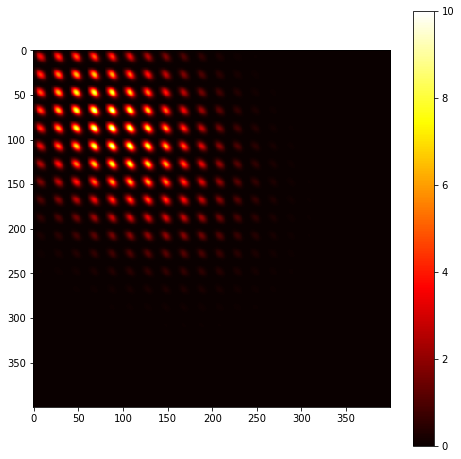

In [17]:
plt.figure(figsize=(8,8))
plt.imshow(K.T, cmap=plt.cm.get_cmap("hot"))
plt.colorbar()

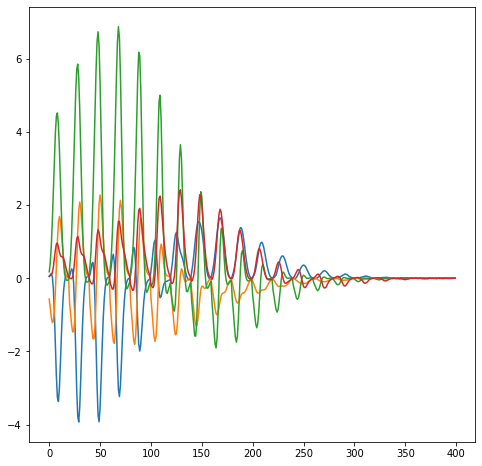

In [18]:
L = np.linalg.cholesky(K)
w = L @ np.random.randn(N**2, 4)

plt.figure(figsize=(8,8))
#plt.plot(w, 'k-', alpha=0.7)
plt.plot(w)
#plt.xlim([0,N-1])

In [19]:
K_eig, K_ev = np.linalg.eigh(K)

(0, 30)

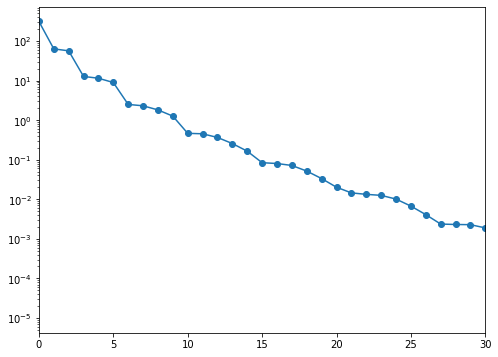

In [20]:
fig = plt.figure(figsize=(8, 6))
plt.semilogy(np.flip(K_eig), '-o')
plt.xlim([0, 30])

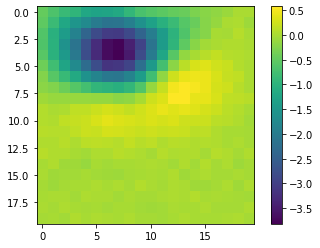

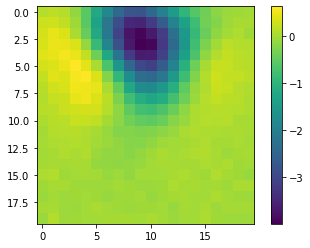

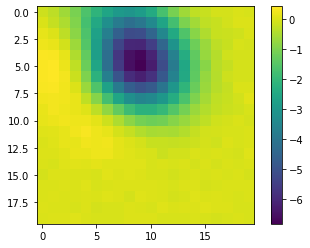

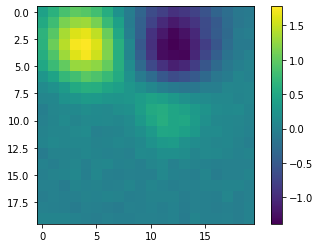

In [53]:
# reshape and plot as images
for i in range(w.shape[1]):
    img = w[:, i].reshape(N,N)
    plt.figure()
    plt.imshow(img)
    plt.colorbar()